In [73]:
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('batsmandatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    batsmandatabase = unpickler.load() 
    file.close()
with open('bowlerdatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    bowlerdatabase = unpickler.load() 
    file.close()
    
with open('playerVplayer__2016_2020.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    playerVplayer = unpickler.load() 
    file.close()

In [4]:
batsmandatabase['V Kohli']

{'bat': [{'matchId': '335982.yaml',
   'matchDate': datetime.datetime(2008, 4, 18, 0, 0),
   'team': 'Royal Challengers Bangalore',
   'ballbyball': {112: [{'bowler': 'I Sharma',
      'thisballbatsmanrun': 0,
      'inningstotal': 4,
      'fours': 0,
      'sixes': 0,
      'out': 'no'}],
    111: [{'bowler': 'I Sharma',
      'thisballbatsmanrun': 0,
      'inningstotal': 8,
      'fours': 0,
      'sixes': 0,
      'out': 'no'}],
    110: [{'bowler': 'I Sharma',
      'thisballbatsmanrun': 1,
      'inningstotal': 9,
      'fours': 0,
      'sixes': 0,
      'out': 'no'}],
    107: [{'bowler': 'AB Dinda',
      'thisballbatsmanrun': 0,
      'inningstotal': 9,
      'fours': 0,
      'sixes': 0,
      'out': 'no'}],
    106: [{'bowler': 'AB Dinda',
      'thisballbatsmanrun': 0,
      'inningstotal': 9,
      'fours': 0,
      'sixes': 0,
      'out': 'bowled'}]},
   'inng': '2nd innings',
   'target': 223,
   'run': 1,
   'battingorder': 3,
   'ballsfaced': 5,
   'dots': 4,
   'fo

In [69]:
for batsman in list(batsmandatabase.keys()):
    if 'Smit' in batsman:
        print(batsman)

GC Smith
DR Smith
SPD Smith


In [71]:
batsmanlistinfirstsixovers=['RV Uthappa','F du Plessis','SK Raina','PP Shaw','S Dhawan','SPD Smith']
batsmannameInFirstSixOvers=[]
batsmanballsperboundaries=[]
batsmaninnings=[]
batsmandismissal=[]
batsmanstrikerate=[]
# batsmanfours=[]
# batsmansixes=[]
bastmanout=[]
startdate='2018-01-01'
enddate='2021-01-01'
for batsman in batsmanlistinfirstsixovers:
    totalRuns=0
    wicketCount=0
    totalfours=0
    totalsixes=0
    dismissals=0
    inningsCount=0
    matchesplayed=0
    ballsfacedbybatsman=[]
    batsmandismissedballs=[]
    for j in batsmandatabase[batsman]['bat']:
        if datetime.datetime.strptime(enddate, '%Y-%m-%d')<j['matchDate']\
        or datetime.datetime.strptime(startdate, '%Y-%m-%d')>j['matchDate']:
            continue
#         batsmanfoursperinnings=[]
#         batsmansixesperinnings=[]
        matchesplayed+=1
        
        for i in list(j['ballbyball'].keys()):
            if i <=119 and i >= 84:
                
                ballsfacedbybatsman.append(i)
                totalBalls=len(ballsfacedbybatsman)
                for k in j['ballbyball'][i]:
                    totalRuns+=k['thisballbatsmanrun']
                    totalfours+=k['fours']
                    totalsixes+=k['sixes']
                    if k['out']!='no':
                        wicketCount+=1
                        batsmandismissedballs.append(i)
                        
#                     batsmanfoursperinnings.append(totalfours)
#                     batsmansixesperinnings.append(totalsixes)
        if list(j['ballbyball'].keys())[0] >= 84:
            inningsCount+=1
        if wicketCount!=0:               
            Avg=round(((totalRuns)/(wicketCount)),2)
        else:
            Avg='NA'
        totalBoundaries= totalfours+totalsixes   
        if totalBalls!=0:
            Strkrate=round((((totalRuns)/(totalBalls))*100),2)
        if inningsCount!=0:
            foursperinnings=round(((totalfours)/(inningsCount)),2)
            sixesperinnings=round(((totalsixes)/(inningsCount)),2)
            runsperinnings=round(((totalRuns)/(inningsCount)),2)
            ballsperinnings=round(((totalBalls)/(inningsCount)),2)
        else:
            foursperinnings='NA'
            sixesperinnings='NA'
            runsperinnings='NA'
            ballsperinnings='NA'
        if  totalBoundaries!=0:
            boundariesperballs=round(((totalBalls)/(totalBoundaries)),2)
        else:
            boundariesperballs='NA'
        
#     print(batsmanfoursperinnings,batsmansixesperinnings)     
    batsmannameInFirstSixOvers.append(batsman)
    batsmanballsperboundaries.append(boundariesperballs)
    batsmanstrikerate.append(Strkrate)
    batsmaninnings.append(inningsCount)
    batsmandismissal.append(wicketCount)
    print(batsman,matchesplayed,inningsCount,totalRuns,totalBalls,totalfours,totalsixes,wicketCount,Avg,Strkrate,foursperinnings,sixesperinnings,runsperinnings,ballsperinnings,boundariesperballs)
            
            
print(batsmannameInFirstSixOvers,"\n",batsmanstrikerate,"\n",batsmanballsperboundaries)    
    

RV Uthappa 39 30 332 279 38 14 11 30.18 119.0 1.27 0.47 11.07 9.3 5.37
F du Plessis 31 30 469 396 58 12 15 31.27 118.43 1.93 0.4 15.63 13.2 5.66
SK Raina 32 26 254 206 40 4 9 28.22 123.3 1.54 0.15 9.77 7.92 4.68
PP Shaw 38 38 548 417 75 16 25 21.92 131.41 1.97 0.42 14.42 10.97 4.58
S Dhawan 49 49 835 616 110 22 24 34.79 135.55 2.24 0.45 17.04 12.57 4.67
SPD Smith 24 17 154 137 19 4 6 25.67 112.41 1.12 0.24 9.06 8.06 5.96
['RV Uthappa', 'F du Plessis', 'SK Raina', 'PP Shaw', 'S Dhawan', 'SPD Smith'] 
 [119.0, 118.43, 123.3, 131.41, 135.55, 112.41] 
 [5.37, 5.66, 4.68, 4.58, 4.67, 5.96]


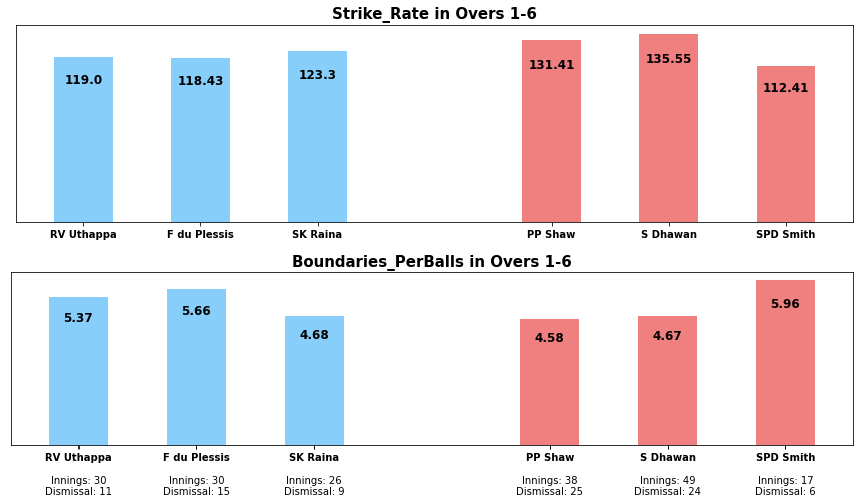

In [72]:
X = [0,1,2,4,5,6]
width = 0.5
fig=plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(211)

# ax1 = fig.add_axes([0,0,1,1])

x=list()
for i in X:
    x.extend([i,i+.001])
ax1.set_xticks(X) #X for dotballs x for SR

rects1Label='Strike_Rate'
rects1=ax1.bar(X, batsmanstrikerate, color = (['lightskyblue']*3)+(['lightcoral']*3), width = width, label=rects1Label)
xticklabels=[]
for i in range(len(batsmannameInFirstSixOvers)):
    xticklabels.append(batsmannameInFirstSixOvers[i])
    
def autolabel(rects,ax):
    for rect in rects:
        h = rect.get_height()
#         ax.bar(color='red')
        ax.text(rect.get_x()+rect.get_width()/2., 0.9*h, h,
                ha='center', va='top',size=12,rotation=0,weight='bold') #bar-head font-size
autolabel(rects1,ax1)
for label in ax1.get_xticklabels():
        label.set_weight('bold')

ax1.set_xticklabels(xticklabels,size=10)
ax1.yaxis.set_visible(False)
ax1.set_title(rects1Label+" in Overs 1-6",weight='bold',size=15)


ax2 = fig.add_axes([0.12, 0.15, 0.78, 0.3])
rects2Label='Boundaries_PerBalls'
rects2=ax2.bar(X, batsmanballsperboundaries, color =(['lightskyblue']*3)+(['lightcoral']*3), width = width, label=rects2Label)

ax2.set_xticks(x)
xticklabels=[]
for i in range(len(batsmannameInFirstSixOvers)):
    xticklabels.append(batsmannameInFirstSixOvers[i])
    xticklabels.append("\n\nInnings: "+str(batsmaninnings[i])+\
                "\nDismissal: "+str(batsmandismissal[i]))
ax2.set_xticklabels(xticklabels,size=10)
autolabel(rects2,ax2)
for label in ax2.get_xticklabels():
    if label.get_text() in batsmannameInFirstSixOvers:
        label.set_weight('bold')
ax2.yaxis.set_visible(False)
ax2.set_title(rects2Label+" in Overs 1-6",weight='bold',size=15)
plt.show()
fig.savefig('batsmanCSK_DC_1_6.png',bbox_inches='tight',pad_inches=0,dpi=500) #change filename